### Q) Consider only the below columns and prepare a prediction model for predicting Price. Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [2]:
import pandas as pd

In [4]:
data0=pd.read_csv('E:/Data Science/Toyotacorolla.csv',encoding = 'unicode_escape')
data0.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df=pd.DataFrame(data0)

In [6]:
df=df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

### perform EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [10]:
data=df.copy()

In [11]:
data[data.duplicated()].shape

(1, 9)

In [12]:
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
data=data.drop_duplicates()
data.shape

(1435, 9)

In [14]:
data=data.rename({'Price':'p','Age_08_04':'age','KM':'km','HP':'hp','Doors':'dr','Gears':'gr','Quarterly_Tax':'qt','Weight':'wt'},axis=1)
data.head()

,p,age,km,hp,cc,dr,gr,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


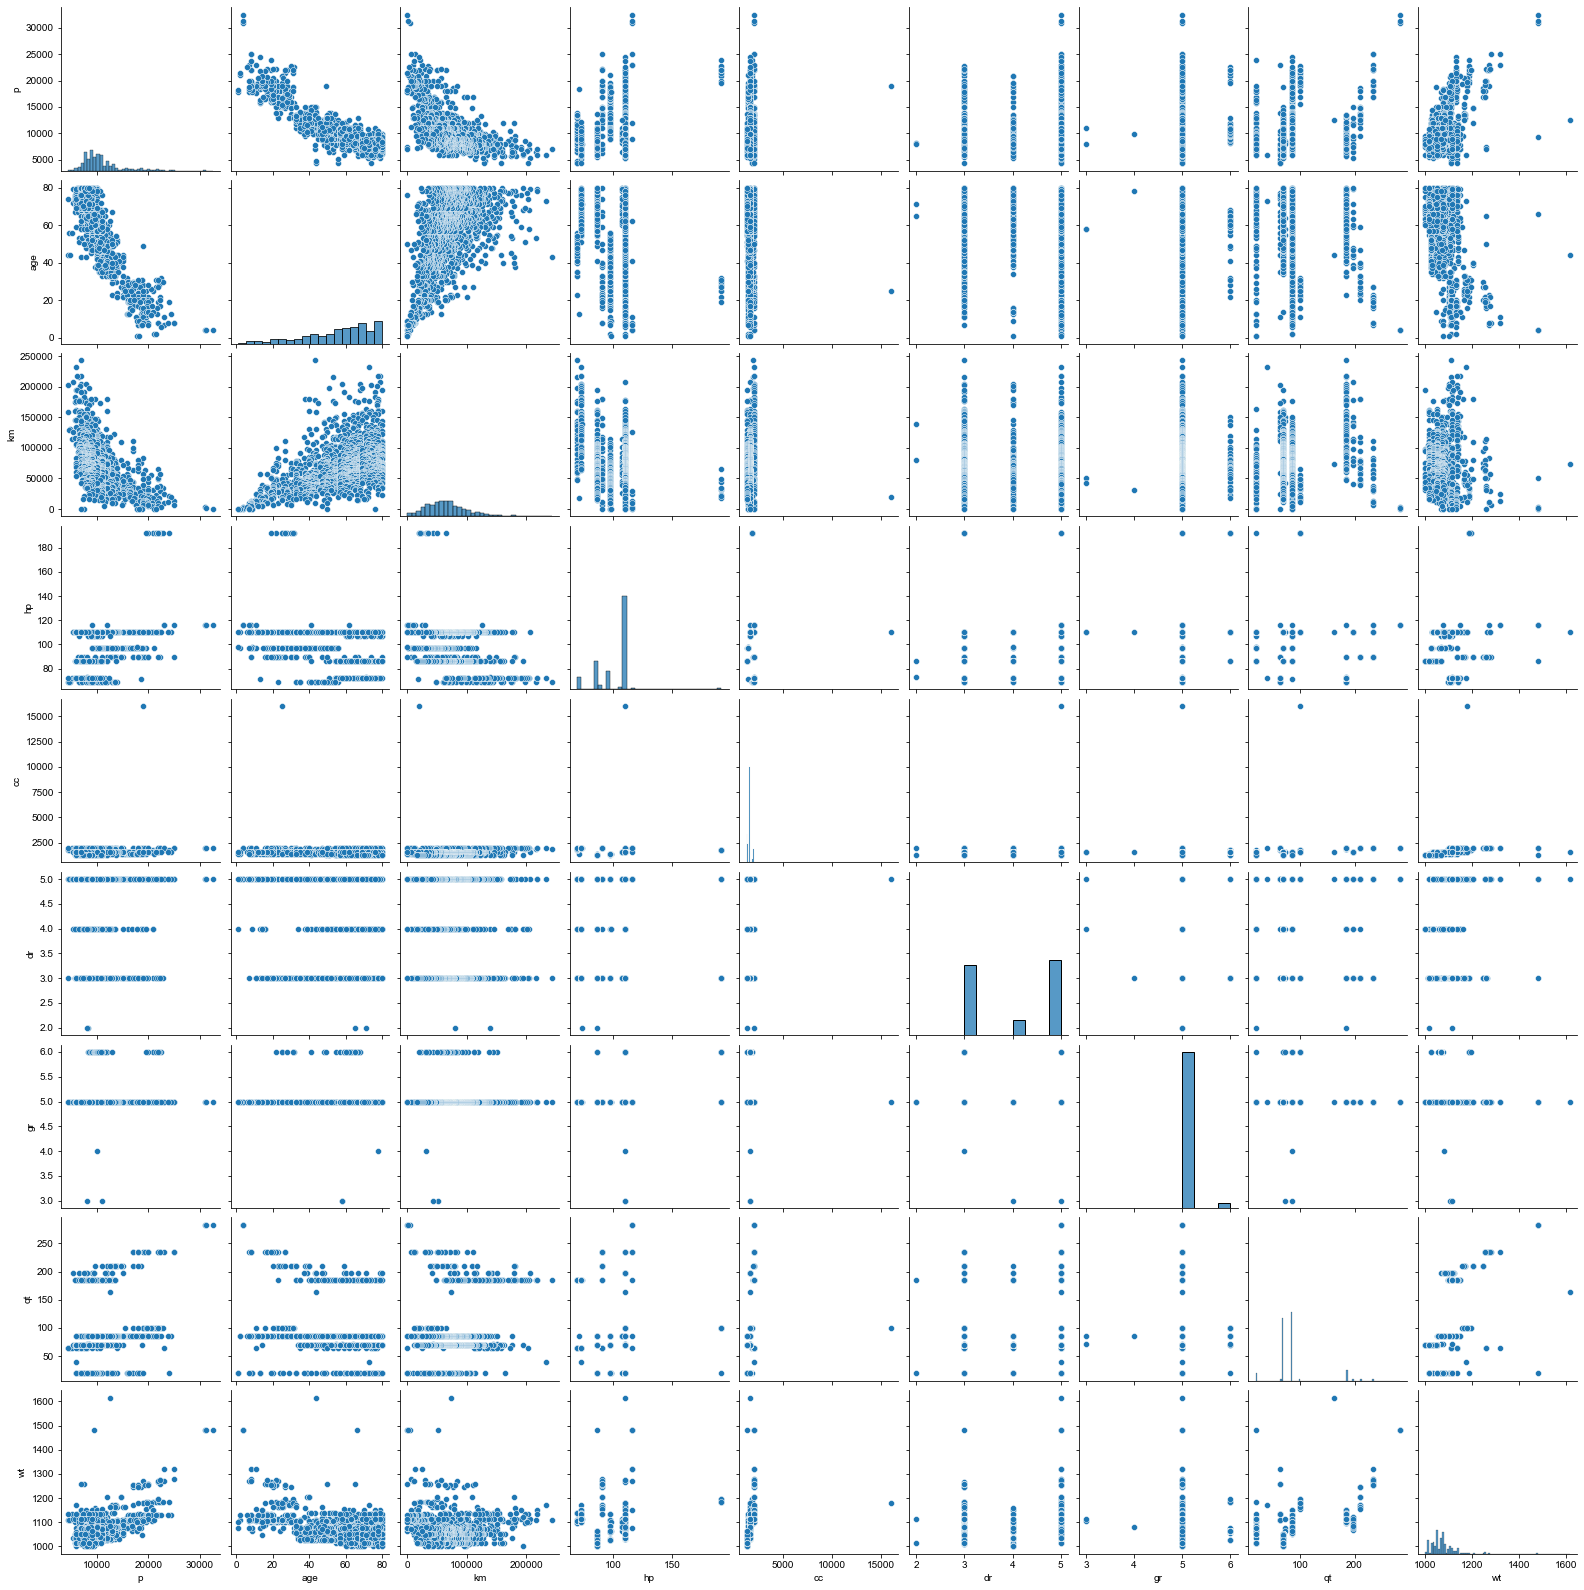

In [15]:
# Scatterplot between variables along with histogram
sns.pairplot(data)
sns.set_style(style='darkgrid')

In [16]:
#correlation matrix
data.corr()

,p,age,km,hp,cc,dr,gr,qt,wt
p,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
dr,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gr,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
qt,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [17]:
#Transformation od data
#from sklearn.preprocessing import StandardScaler
#data_std=StandardScaler().fit_transform(data)

In [18]:
#data_std=pd.DataFrame(data_std,index=data.index,columns=data.columns)
#data_std

### Preparing Model

In [19]:
#Build a Model
model=smf.ols('p~age+km+hp+cc+dr+gr+qt+wt',data=data).fit()
(model.tvalues,model.pvalues)

(Intercept    -3.875273
 age         -46.551876
 km          -16.552424
 hp           11.209719
 cc           -1.316436
 dr           -0.023012
 gr            3.034563
 qt            2.944198
 wt           15.760663
 dtype: float64,
 Intercept     1.113392e-04
 age          1.879217e-288
 km            1.994713e-56
 hp            5.211155e-28
 cc            1.882393e-01
 dr            9.816443e-01
 gr            2.452430e-03
 qt            3.290363e-03
 wt            1.031118e-51
 dtype: float64)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:27:38   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
dr            -0.9202     39.988     -0.023      0.982     -79.362      77.522
gr           597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### We see that p values of 'cc' and 'dr' are insegnificant

### Simple Linear Regression

In [21]:
ml_cc=smf.ols('p~cc',data=data).fit()
(ml_cc.tvalues,ml_cc.pvalues)

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [22]:
ml_dr=smf.ols('p~dr',data=data).fit()
(ml_dr.tvalues,ml_dr.pvalues)

(Intercept    19.421546
 dr            7.070520
 dtype: float64,
 Intercept    8.976407e-75
 dr           2.404166e-12
 dtype: float64)

In [23]:
ml_c_d=smf.ols('p~cc+dr',data=data).fit()
(ml_c_d.tvalues,ml_c_d.pvalues)

(Intercept    12.786341
 cc            4.268006
 dr            6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 dr           2.109558e-11
 dtype: float64)

### Residual Analysis

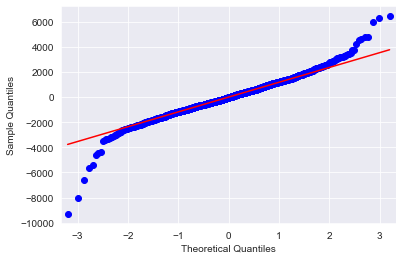

In [24]:
# Test fon Normality of resid (Q-Q plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')

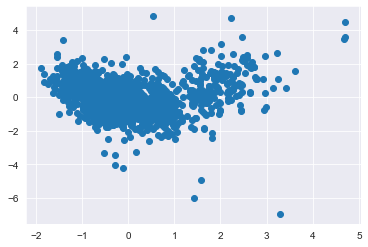

In [25]:
#error vs fitted values
def set_standardized_values (vals):
    return (vals-vals.mean())/vals.std()
plt.scatter(set_standardized_values(model.fittedvalues),set_standardized_values(model.resid))
plt.show()

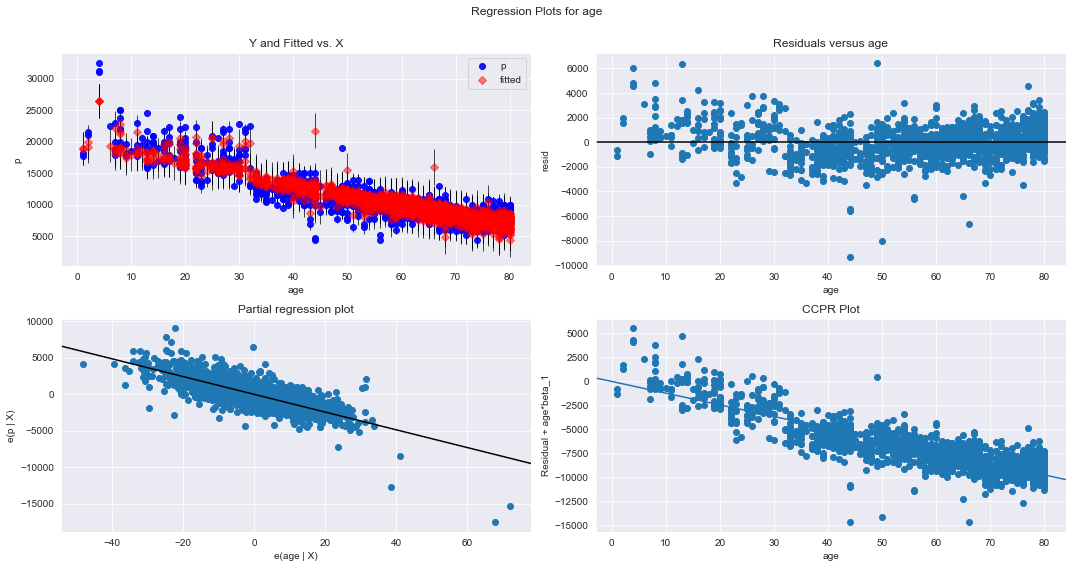

In [26]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"age",fig=fig)

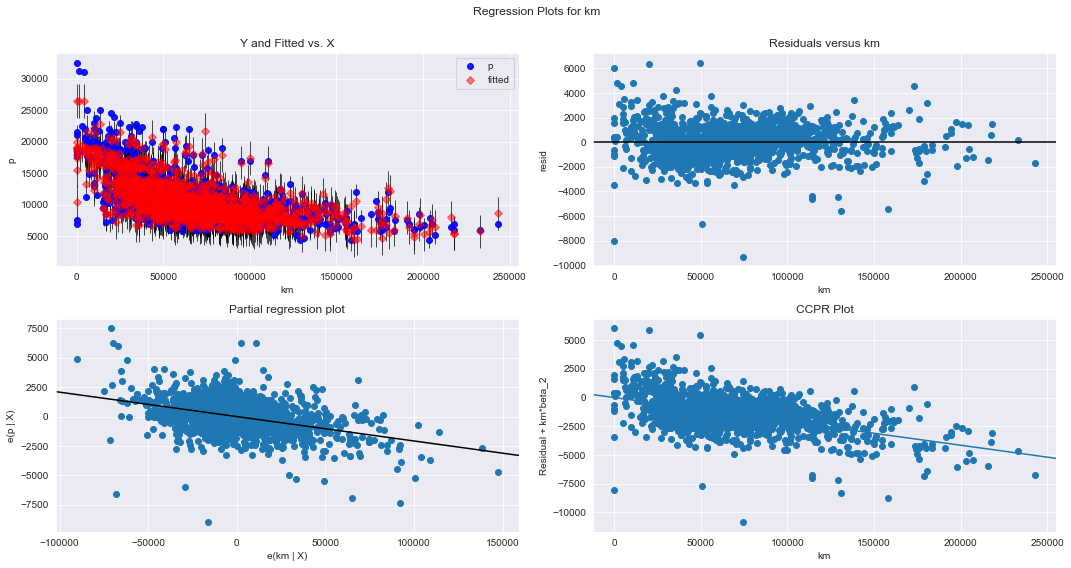

In [27]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"km",fig=fig)

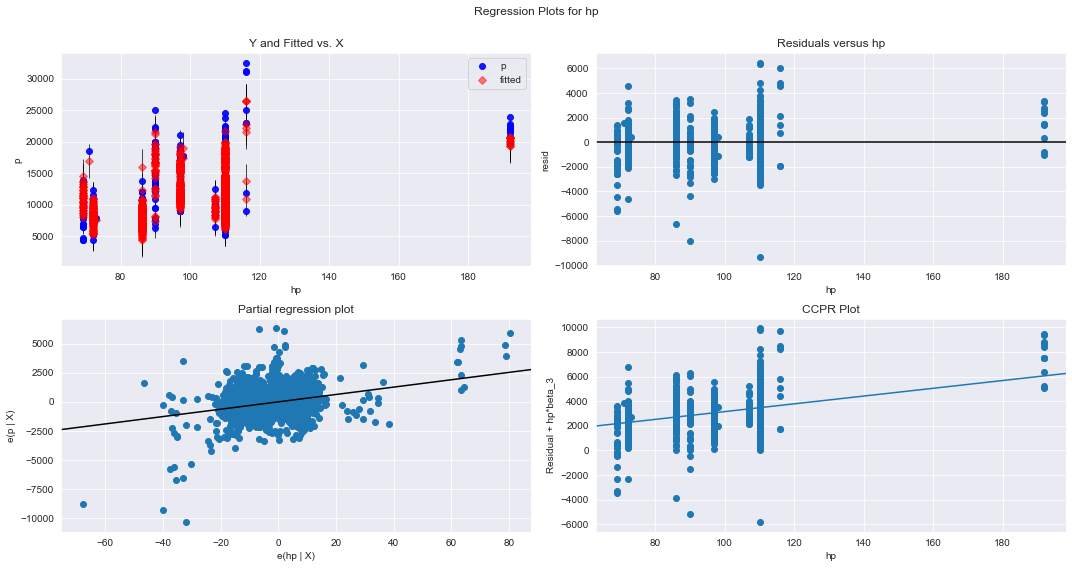

In [28]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"hp",fig=fig)

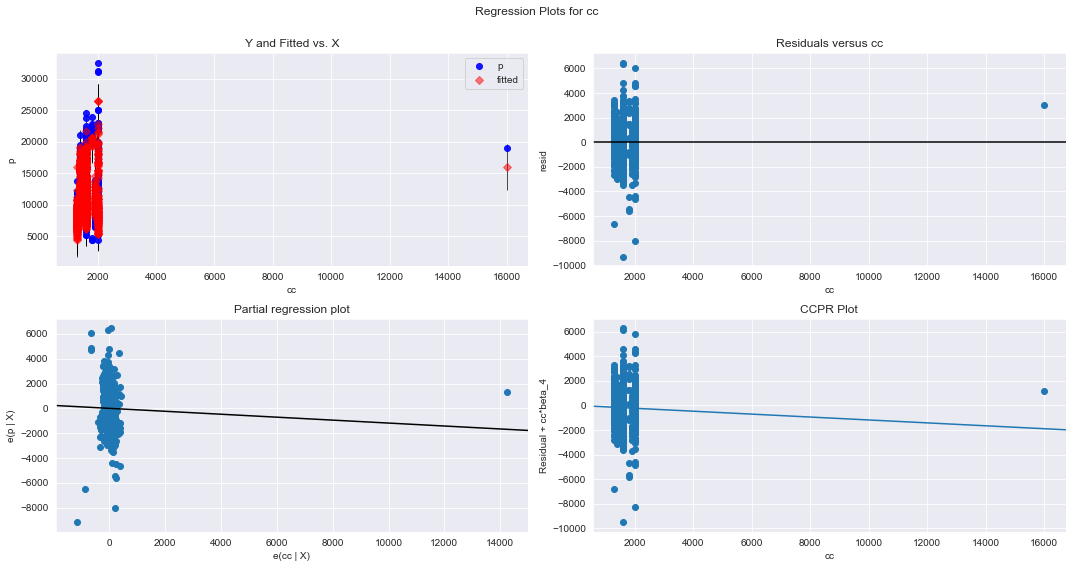

In [29]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)

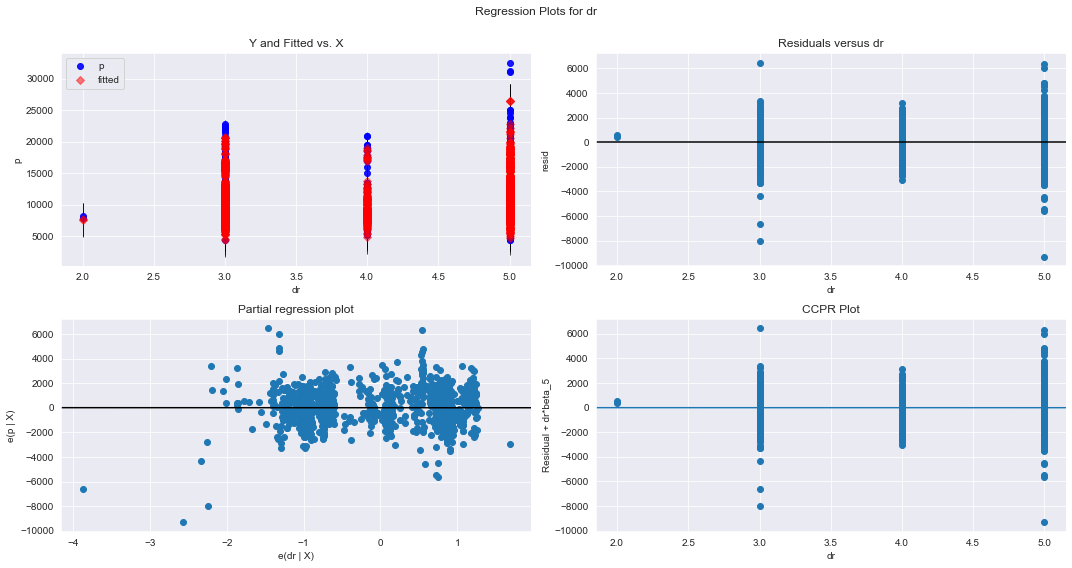

In [30]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"dr",fig=fig)

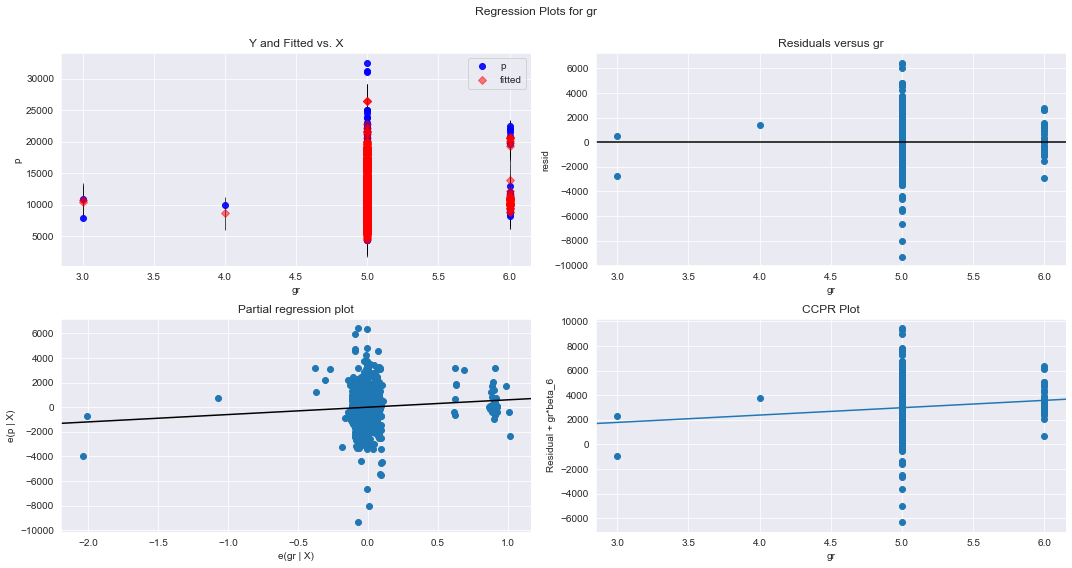

In [31]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"gr",fig=fig)

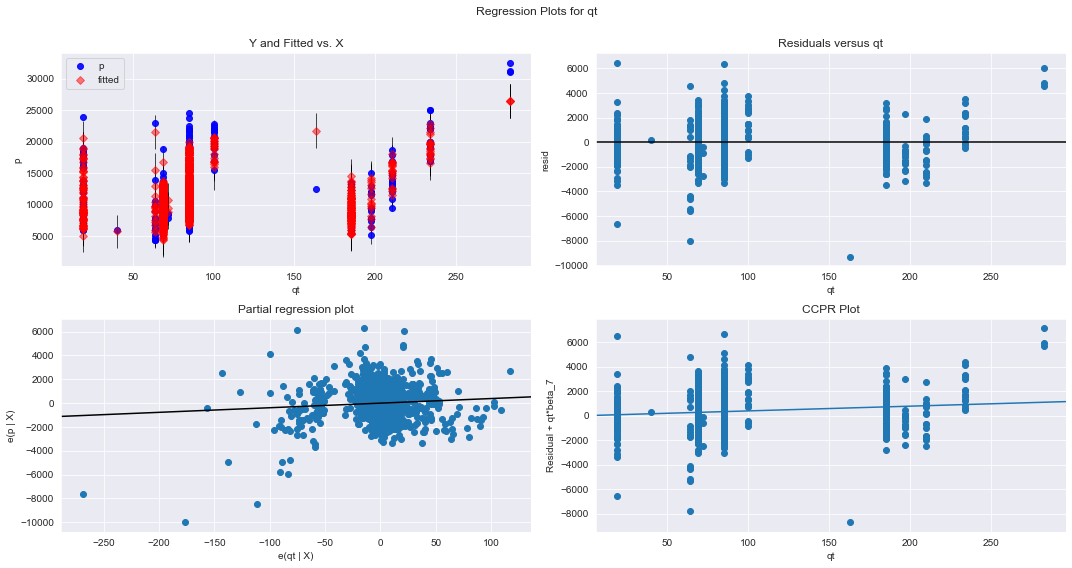

In [32]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"qt",fig=fig)

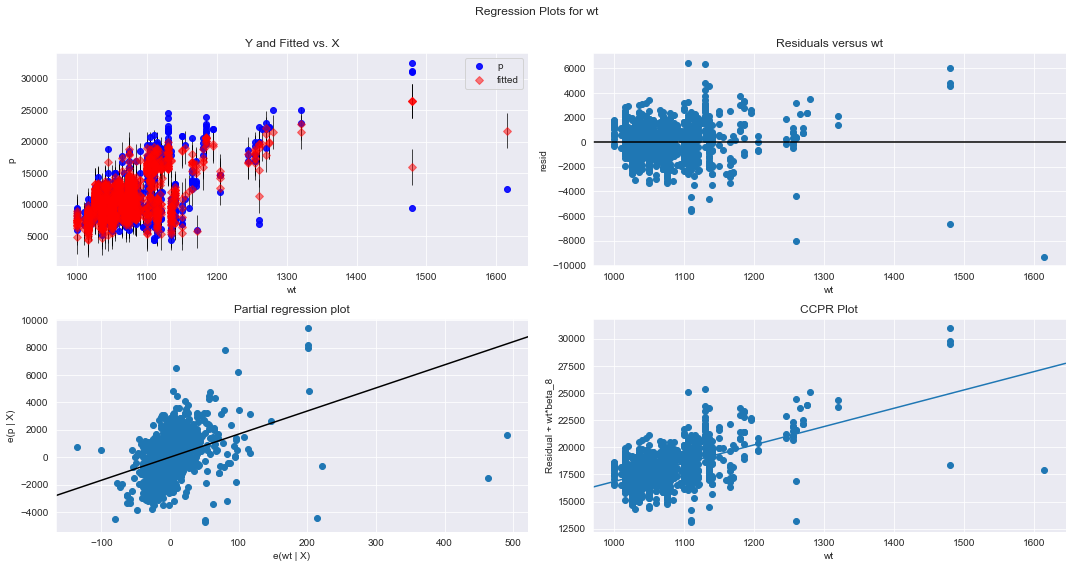

In [33]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"wt",fig=fig)

In [34]:
list(np.where(model.resid>3000))

[array([  16,   52,   62,   74,   80,   91,  109,  110,  111,  114,  124,
         140,  146,  153,  160,  170,  178,  522,  556,  795, 1053, 1057,
        1078, 1401], dtype=int64)]

In [35]:
list(np.where(model.resid<-3000))

[array([   0,  188,  190,  191,  220,  253,  291,  320,  369,  392,  401,
         462,  600,  653,  959, 1381, 1434], dtype=int64)]

In [36]:
# above are influences
data[data.index.isin([16,52,62,74,80,91,109,110,111,114,124,140,146,153,160,170,178,522,556,795,1053,1057,1078,1401,0,188,190,191,220,253,291,320,369,392,401,462,600,653,959,1381,1434])];

In [37]:
#compair with original dataset
data

,p,age,km,hp,cc,dr,gr,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### Improving the model

In [38]:
#keep standard data safe
data_clean=data.copy()

In [39]:
#remove influences and reset index
data_clean=data_clean.drop(data_clean.index[[16,52,62,74,80,91,109,110,111,114,124,140,146,153,160,170,178,522,556,795,1053,1057,1078,1401,0,188,190,191,220,253,291,320,369,392,401,462,600,653,959,1381,1434]],axis=0).reset_index()
data_clean

,index,p,age,km,hp,cc,dr,gr,qt,wt
0,1,13750,23,72937,90,2000,3,5,210,1165
1,2,13950,24,41711,90,2000,3,5,210,1165
2,3,14950,26,48000,90,2000,3,5,210,1165
3,4,13750,30,38500,90,2000,3,5,210,1170
4,5,12950,32,61000,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1389,1430,8450,80,23000,86,1300,3,5,69,1015
1390,1431,7500,69,20544,86,1300,3,5,69,1025
1391,1432,10845,72,19000,86,1300,3,5,69,1015
1392,1433,8500,71,17016,86,1300,3,5,69,1015


In [40]:
#drop original index
data_clean=data_clean.drop(['index'],axis=1)
data_clean.tail()

,p,age,km,hp,cc,dr,gr,qt,wt
1389,8450,80,23000,86,1300,3,5,69,1015
1390,7500,69,20544,86,1300,3,5,69,1025
1391,10845,72,19000,86,1300,3,5,69,1015
1392,8500,71,17016,86,1300,3,5,69,1015
1393,7250,70,16916,86,1300,3,5,69,1015


In [41]:
# Again build a model
final_ml=smf.ols('p~age+km+hp+cc+dr+gr+qt+wt',data=data_clean).fit()
(final_ml.tvalues,final_ml.pvalues)

(Intercept   -10.755170
 age         -49.104507
 km          -16.085511
 hp           11.275396
 cc          -10.487873
 dr           -4.041704
 gr            3.551525
 qt            1.138329
 wt           22.765200
 dtype: float64,
 Intercept     5.750697e-26
 age          1.513815e-305
 km            1.658886e-53
 hp            2.838206e-28
 cc            8.123847e-25
 dr            5.598225e-05
 gr            3.958440e-04
 qt            2.551801e-01
 wt            1.035609e-97
 dtype: float64)

In [42]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1498.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:28:23   Log-Likelihood:                -11693.
No. Observations:                1394   AIC:                         2.340e+04
Df Residuals:                    1385   BIC:                         2.345e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.481e+04   1376.873    -10.755      0.000   -1.75e+04   -1.21e+04
age         -110.7272      2.255    -49.105      0.000    -115.151    -106.304
km            -0.0172      0.001    -16.086      0.000      -0.019      -0.015
hp            28.8584      2.559     11.275      0.000      23.838      33.879
cc            -2.9543      0.282    -10.488      0.000      -3.507      -2.402
dr          -135.8630     33.615     -4.042      0.000    -201.805     -69.921
gr           560.2634    157.753      3.552      0.000     250.803     869.724
qt             1.4747      1.295      1.138      0.255      -1.067       4.016
wt            30.0458      1.320     22.765      0.000      27.457      32.635
==============================================================================
Omnibus:                        2.320   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.265
Skew:                           0.098   Prob(JB):                        0.322
Kurtosis:                       3.022   Cond. No.                     3.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cook's distances

In [43]:
model_influence=final_ml.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

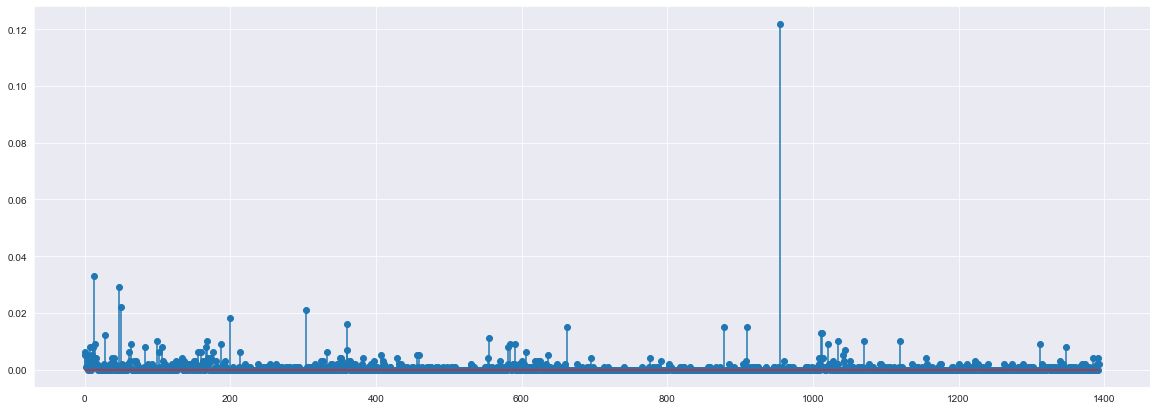

In [44]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_clean)),np.round(c,3))

In [45]:
#index of the data points where c is more than 0.5
(np.argmax(c),np.max(c))

(955, 0.1220508224612475)

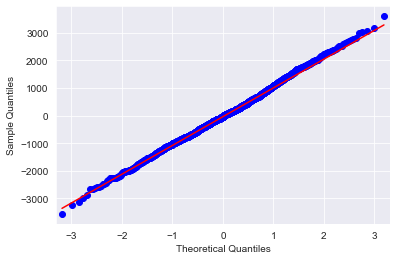

In [46]:
qqplot=sm.qqplot(final_ml.resid,line='q')

In [47]:
list(np.where(final_ml.resid>3000))

[array([  99,  156,  160,  662, 1021], dtype=int64)]

In [48]:
list(np.where(final_ml.resid<-3000))

[array([ 556,  955, 1312], dtype=int64)]

In [49]:
#remove influences and reset index
data_clean=data_clean.drop(data_clean.index[[99,156,160,662,1021,556,955,1312]],axis=0).reset_index()

In [50]:
data_clean

,index,p,age,km,hp,cc,dr,gr,qt,wt
0,0,13750,23,72937,90,2000,3,5,210,1165
1,1,13950,24,41711,90,2000,3,5,210,1165
2,2,14950,26,48000,90,2000,3,5,210,1165
3,3,13750,30,38500,90,2000,3,5,210,1170
4,4,12950,32,61000,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1381,1389,8450,80,23000,86,1300,3,5,69,1015
1382,1390,7500,69,20544,86,1300,3,5,69,1025
1383,1391,10845,72,19000,86,1300,3,5,69,1015
1384,1392,8500,71,17016,86,1300,3,5,69,1015


In [51]:
data_clean=data_clean.drop(['index'],axis=1)
data_clean

,p,age,km,hp,cc,dr,gr,qt,wt
0,13750,23,72937,90,2000,3,5,210,1165
1,13950,24,41711,90,2000,3,5,210,1165
2,14950,26,48000,90,2000,3,5,210,1165
3,13750,30,38500,90,2000,3,5,210,1170
4,12950,32,61000,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1381,8450,80,23000,86,1300,3,5,69,1015
1382,7500,69,20544,86,1300,3,5,69,1025
1383,10845,72,19000,86,1300,3,5,69,1015
1384,8500,71,17016,86,1300,3,5,69,1015


In [52]:
#build model on new data set
final_ml_new=smf.ols('p~age+km+hp+cc+dr+gr+qt+wt',data=data_clean).fit()
(final_ml_new.tvalues,final_ml_new.pvalues)

(Intercept   -11.123232
 age         -49.171090
 km          -16.425371
 hp           11.835735
 cc          -11.574652
 dr           -4.836257
 gr            2.405108
 qt            0.905184
 wt           24.148959
 dtype: float64,
 Intercept     1.390969e-27
 age          2.064774e-305
 km            1.673784e-55
 hp            7.541002e-31
 cc            1.239365e-29
 dr            1.471751e-06
 gr            1.629894e-02
 qt            3.655264e-01
 wt           1.014707e-107
 dtype: float64)

In [53]:
final_ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1544.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:28:37   Log-Likelihood:                -11591.
No. Observations:                1386   AIC:                         2.320e+04
Df Residuals:                    1377   BIC:                         2.325e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.509e+04   1356.200    -11.123      0.000   -1.77e+04   -1.24e+04
age         -108.8410      2.214    -49.171      0.000    -113.183    -104.499
km            -0.0172      0.001    -16.425      0.000      -0.019      -0.015
hp            29.6915      2.509     11.836      0.000      24.770      34.613
cc            -3.2005      0.277    -11.575      0.000      -3.743      -2.658
dr          -159.5001     32.980     -4.836      0.000    -224.197     -94.803
gr           388.4101    161.494      2.405      0.016      71.610     705.211
qt             1.1476      1.268      0.905      0.366      -1.339       3.635
wt            31.4015      1.300     24.149      0.000      28.851      33.952
==============================================================================
Omnibus:                        4.003   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.891
Skew:                           0.097   Prob(JB):                        0.143
Kurtosis:                       2.827   Cond. No.                     3.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting for new data points

In [54]:
#new data for predictions
newdata=pd.DataFrame({'age':40,'km':60000,'hp':100,'cc':1500,'dr':4,'gr':5,'qt':85,'wt':1000},index=[1])
newdata

,age,km,hp,cc,dr,gr,qt,wt
1,40,60000,100,1500,4,5,85,1000


In [55]:
final_ml_new.predict(newdata)

1    10503.196607
dtype: float64

In [56]:
y=np.array(data_clean['p'])

In [57]:
y_pred=final_ml_new.predict(data_clean)

In [58]:
#check RMSE value
import sklearn.metrics as mt
mse=mt.mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)  #mse**(0.5)
rmse

1036.717953206776